### Load neccessary utilities

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils import plot_model
from sklearn.metrics import roc_curve, auc


Using TensorFlow backend.


### Import dataset which contains labeled images for photons and pi0

In [2]:
# import dataset into pandas
data_train= np.loadtxt("output0.csv")
data_train.shape

(70000, 82)

In [7]:
(X_train, y_train)= (data_train[:,0:81],data_train[:,81])
#X_train = X_train.reshape(X_train.shape[0], 9,9,1)
Y_train = to_categorical(y_train, 2)
Y_train.shape[1]

2

### Create, compile and train model

In [11]:
# create model
print "creating model=========>"
model = Sequential()
model.add(Dense(128,input_dim=81, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(Y_train.shape[1], activation='softmax'))
# Compile model
print "compilation up next=======>"
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['binary_accuracy'])
model.summary()
plot_model(model, to_file='modelANN.png',show_shapes=True,show_layer_names=True)
#fitting
print "fitting now=========>"
history = model.fit(X_train,Y_train , batch_size=200, epochs=20, validation_split=0.2, verbose=1)

creating model=========>
compilation up next=======>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               10496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                6450      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 102       
Total params: 17,048
Trainable params: 17,048
Non-trainable params: 0
_________________________________________________________________
fitting now=========>
Train on 56000 samples, validate on 14000 samples
Epoch 1/20
56000/56000 [==============================] - 4s - loss: 0.5725 - binary_accuracy: 0.7157 - val_loss: 0.5136 - val_binary_accuracy: 0

### Plot accuracy and loss

['loss', 'val_binary_accuracy', 'val_loss', 'binary_accuracy']


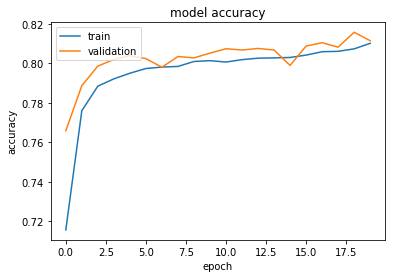

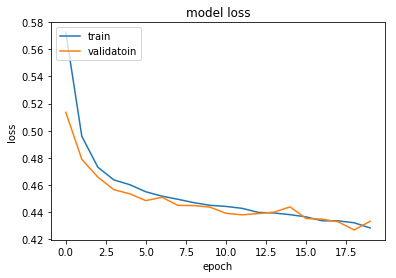

In [12]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validatoin'], loc='upper left')
plt.show()

### Save model (architecture and weights) for testing

In [24]:
# serialize model to JSON
model_json = model.to_json()
with open("ANN_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("ANN_model.h5")
print("Saved model to disk")

Saved model to disk
